# Lab | Cleaning categorical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data.

### Instructions

- Import the necessary libraries if you are starting a new notebook. Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv

- Find all of the categorical data. Save it in a categorical_df variable.

- Check for NaN values.

- Check all unique values of columns.

- Check dtypes. Do they all make sense as categorical data?

- Does any column contain alpha and numeric data? Decide how to clean it.

- Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.

- Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

- Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [41]:
# Import the necessary libraries if you are starting a new notebook. 
# Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
data.columns = [x.replace(' ','_').lower() for x in data.columns]
data.head()


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [32]:
# Find all of the categorical data. Save it in a categorical_df variable.

data.dtypes

categorical_df = data.select_dtypes('object')

categorical_df.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [33]:
# Check for NaN values.

categorical_df.isna().sum()

# no null values in the dataset

customer             0
state                0
response             0
coverage             0
education            0
effective_to_date    0
employmentstatus     0
gender               0
location_code        0
marital_status       0
policy_type          0
policy               0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
dtype: int64

In [38]:
# Check all unique values of columns.

for x in categorical_df.columns:
    print(categorical_df[x].value_counts())

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
No     7826
Yes    1308
Name: response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/22/11    158
2/5/11     158
2/3/11     158
2/7/11     157
2/12/11   

In [39]:
# Check dtypes. Do they all make sense as categorical data?
categoricals.dtypes

Customer             object
State                object
Response             object
Coverage             object
Education            object
Effective To Date    object
EmploymentStatus     object
Gender               object
Location Code        object
Marital Status       object
Policy Type          object
Policy               object
Renew Offer Type     object
Sales Channel        object
Vehicle Class        object
Vehicle Size         object
dtype: object

In [47]:
# Does any column contain alpha and numeric data? Decide how to clean it.

# There are columns with aplhanumeric data.

# 1) renew offer type. It might make sense to delete 'offer' from all values. Maybe not necessary. 
# It depends on the exact meaning of the column, whether I would do that. If it's just a offer type, it doesn't matter.
# If there is some ranking between offer1 - offer4 it could make sense to just keep the number.

# 2) policy - I would use regex to delete all text from the column and just leave numbers 1-3. 
# The information regarding corporate, personal or special is available in'policy type' anyway

# 3) Customer ID - not relevant, therefore no cleaning necessary



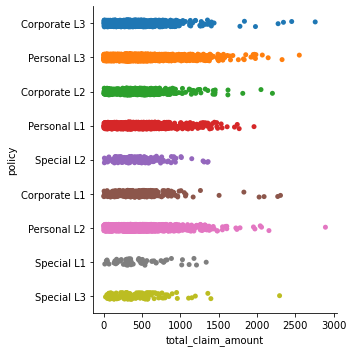

In [48]:
sns.catplot(x='total_claim_amount',y='policy', data=data)

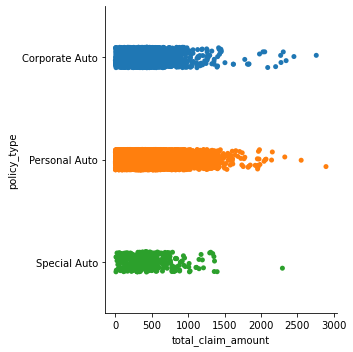

In [51]:
sns.catplot(x='total_claim_amount',y='policy_type', data=data)

In [7]:
# Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.

# For all variables we have a strong class imbalance. 

In [8]:
# Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

# Policy and policy type contain information about the type of the policy and some kind of level.
# both contain the information whether it's a corporate, personal or special policy.
# therefore we can get rid of one of those
# either we work with two variables - policy type and policy (reduced to 1,2,3)
# or we keep the concated information in policy and get rid of policy type.
# Third option based on the plots is, that the type of the has a bigger impact than policy level.
# Therefor we could also just stick to policy type and delete policy.

In [9]:
# Check number of unique values in each column, can they be combined in any way to ease encoding? 
# Comment your thoughts and make those changes.

